In [4]:
# THIS CAN BE USED TO ANALYZE AND GRAPH PLANT INFORMATION (LIKE AREA) OVER A SINGLE DAY

import plantcv as pcv
import json
import matplotlib.pyplot as plt
import csv
import numpy as np
import os

areas = np.array([])
times = np.array([])
folder = '2020-07-14' # CHANGE THIS PER DAY OF ANALYSIS 
for file in sorted(os.listdir('**** CHANGE THIS ****/fullDAY_Results/{}_results'.format(folder))): # CHANGE FOLDERS TO SUIT YOUR COMPUTER
    if file != '.ipynb_checkpoints' and file != '.DS_Store':
        text_data = open('**** CHANGE THIS ****/fullDAY_Results/{a}_results/{b}'.format(a=folder,b=file))
        data_dict = json.load(text_data)
        area = data_dict['observations']['area']['value']
        areas = np.append(areas, area)
        fileTime = file.split('_')
        fileTime = fileTime[2]
        filetime = fileTime.split(':')
        filetime = '{h}.{m}'.format(h=filetime[0],m=int(filetime[1])*100//60)
        filetime = float(filetime)
        times = np.append(times, filetime)
print(areas, times)

# plot the areas vs time
x = times
y = areas

plt.title('Area VS Time of Day')
plt.scatter(x,areas,color='blue')
plt.xlabel('Hour of Day (2020-07-14)') # CHANGE THE DATE
plt.ylabel('Area of plant [Pixels]')
plt.savefig('Areas_July14_DAY.png') # CHANGE THE DATE

plt.show()


15743.269430051814
160 18.58
159 18.5
149 17.66
148 17.58
146 17.41
142 17.8
125 15.66
106 14.8
[11459. 15548. 15558. 15444. 15405. 15293. 15152. 15141. 15136. 16349.
 16339. 16413. 16432. 16457. 16455. 16496. 16512. 16530. 16542. 16511.
 16487. 16458. 16439. 16426. 16447. 16426. 16419. 16442. 16464. 16418.
 16428. 16435. 16457. 16468. 16471. 16565. 16630. 16507. 16474. 16485.
 16510. 16438. 16486. 16382. 16309. 16431. 16183. 16534. 16325. 16275.
 16212. 16076. 15624. 15168. 14932. 14843. 14665. 14351. 14449. 14408.
 14354. 14149. 14081. 13924. 13843. 13638. 13714. 13683. 13719. 13565.
 13498. 13430. 13493. 13415. 13355. 13201. 13122. 12864. 13138. 13013.
 13444. 13615. 13101. 12976. 13406. 14030. 14175. 13883. 13226. 12956.
 13208. 13836. 14812. 15139. 14859. 14024. 13666. 13659. 14464. 13768.
 15255. 16305. 16132. 16184. 15859. 17328. 16148. 15353. 15081. 15016.
 14619. 14843. 15055. 14256. 15815. 15154. 15560. 16329. 16437. 16328.
 15522. 15747. 17006. 16702. 17169. 16953. 17331. 17

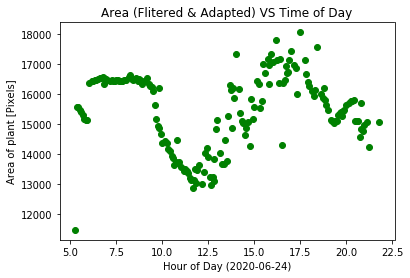

In [4]:
# THE FOLLOWING IS AN OPTIONAL WAY TO FILTER OUTLIER DATA THAT STRAYS A CERTAIN AMOUNT FROM THE MEAN OF THE DAY:



def removeOutliers(areas,times):
    mean = np.mean(areas)
    print(mean)
    for i in range(len(areas)-1,0,-1):
        if (areas[i]/mean > 1.2) or (areas[i]/mean < 0.8):
            areasFiltered = np.delete(areas, i)
            timesFiltered = np.delete(times, i)
            print(i, times[i])
            areas = areasFiltered
            times = timesFiltered
    return areas, times
areasFiltered, timesFiltered = removeOutliers(areas, times)
print(areasFiltered, timesFiltered)
# plot the areas vs time
x = timesFiltered
y = areasFiltered

#plt.title('Area (Flitered) VS Time of Day')
plt.title('Area (Flitered) VS Time of Day')
plt.scatter(x,y,color='green')
plt.xlabel('Hour of Day (2020-06-24)')
plt.ylabel('Area of plant [Pixels]')
#plt.savefig('AreasJune24afterFilter.png')
plt.savefig('AreasJune24afterFilter.png')

plt.show()